**Purpose:** Make the cross similarity function.

In [1]:
import string
import numpy as np
import networkx as nx
import pubmed_parser as pp
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm.notebook import tqdm

In [2]:
pmids = [26016486, 25749135, 11983860, 21687533, 28828194]
index = list(range(len(pmids)))

In [3]:
def get_article(pmid):
    article = pp.parse_xml_web(pmid, sleep = 1)
    return article

In [4]:
def print_article(article):
    print(article['title'])
    print(article['authors'])
    print(article['journal'])
    print('https://www.ncbi.nlm.nih.gov/pubmed/' + article['pmid'])

In [5]:
def get_keys(article):
    k_list = []
    try:
        for k in article['keywords'].split(';'):
            k_list.append(k.split(':')[1])
        keys = tokenize(' '.join(k_list))
    except:
        keys = np.array([])
    return keys

In [6]:
def tokenize(words):
    words = words.lower()
    words = words.translate(str.maketrans('', '', string.punctuation))
    tokens = words.split()
    return np.array(tokens)

In [7]:
def content_similarity(article1, article2, weights = (2, 1)):
    title_arr1 = tokenize(article1['title'])
    title_arr2 = tokenize(article2['title'])
    title_ss = len(np.intersect1d(title_arr1, title_arr2))
    
    abstract_arr1 = tokenize(article1['abstract'])
    abstract_arr2 = tokenize(article2['abstract'])
    abstract_ss = len(np.intersect1d(abstract_arr1, abstract_arr2))
    
    content_arr = np.array([title_ss, abstract_ss])
    content_weights = np.array(weights)
    content_ss = np.dot(content_arr, content_weights)
    return content_ss

In [8]:
def keyword_similarity(article1, article2):
    keyword_arr1 = np.array(article1['keywords'].split(';'))
    keyword_arr2 = np.array(article2['keywords'].split(';'))
    keyword_ss = len(np.intersect1d(keyword_arr1, keyword_arr2))
    return keyword_ss

In [9]:
def source_similarity(article1, article2, weights = (1, 1, 1)):
    if article1['journal'] == article2['journal']:
        journal_ss = 1
    else:
        journal_ss = 0
        
    affiliation_arr1 = np.array(article1['affiliation'].split(';'))
    affiliation_arr2 = np.array(article2['affiliation'].split(';'))
    affiliation_ss = len(np.intersect1d(affiliation_arr1, affiliation_arr2))
    
    author_arr1 = np.array(article1['authors'].split('; '))
    author_arr2 = np.array(article2['authors'].split('; '))
    author_ss = len(np.intersect1d(author_arr1, author_arr2))
    
    source_arr = np.array([journal_ss, affiliation_ss, author_ss])
    source_weights = np.array(weights)
    source_ss = np.dot(source_arr, source_weights)
    return source_ss

In [10]:
def cross_similarity(article1, article2, weights = (2, 2, 1, 1)):

    key_arr1 = get_keys(article1)
    key_arr2 = get_keys(article2)

    title_arr1 = tokenize(article1['title'])
    title_arr2 = tokenize(article2['title'])

    abstract_arr1 = tokenize(article1['abstract'])
    abstract_arr2 = tokenize(article2['abstract'])

    k1t2 = len(np.intersect1d(key_arr1, title_arr2))
    k2t1 = len(np.intersect1d(key_arr2, title_arr1))
    k1a2 = len(np.intersect1d(key_arr1, abstract_arr2))
    k2a1 = len(np.intersect1d(key_arr2, abstract_arr1))

    cross_arr = np.array([k1t2, k2t1, k1a2, k2a1])
    cross_weights = np.array(weights)
    cross_ss = np.dot(cross_arr, cross_weights)
    
    return cross_ss

In [11]:
def similarity(article1, article2):
    content_ss = content_similarity(article1, article2)
    keyword_ss = keyword_similarity(article1, article2)
    source_ss = source_similarity(article1, article2)
    cross_ss = cross_similarity(article1, article2)
    return content_ss, keyword_ss, source_ss, cross_ss

In [12]:
def draw_graph(nodes, weighted_edges):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)
    nx.draw_networkx(G, with_labels = True, node_color = 'silver')

In [13]:
articles = [get_article(pmid) for pmid in tqdm(pmids)]

In [14]:
content, keyword, source, cross = [], [], [], []

for x, y in list(combinations(index, 2)):
    article1, article2 = articles[x], articles[y]
    c, k, s, cr = similarity(article1, article2)
    if c != 0:
        content.append([x, y, c])
    if k != 0:
        keyword.append([x, y, k])
    if s != 0:
        source.append([x, y, s])
    if cr != 0:
        cross.append([x, y, cr])

In [15]:
for i, article in enumerate(articles):
    print(i)
    print_article(article)
    print('')

0
Staphylococcus aureus infections: epidemiology, pathophysiology, clinical manifestations, and management.
Steven Y C Tong; Joshua S Davis; Emily Eichenberger; Thomas L Holland; Vance G Fowler
Clinical microbiology reviews
https://www.ncbi.nlm.nih.gov/pubmed/26016486

1
Pathogenesis of Staphylococcus aureus abscesses.
Scott D Kobayashi; Natalia Malachowa; Frank R DeLeo
The American journal of pathology
https://www.ncbi.nlm.nih.gov/pubmed/25749135

2
Global changes in gene expression by human polymorphonuclear leukocytes during receptor-mediated phagocytosis: cell fate is regulated at the level of gene expression.
Scott D Kobayashi; Jovanka M Voyich; Cassandra L Buhl; Robert M Stahl; Frank R DeLeo
Proceedings of the National Academy of Sciences of the United States of America
https://www.ncbi.nlm.nih.gov/pubmed/11983860

3
Phages in nature.
Martha Rj Clokie; Andrew D Millard; Andrey V Letarov; Shaun Heaphy
Bacteriophage
https://www.ncbi.nlm.nih.gov/pubmed/21687533

4
Phage therapy: An 

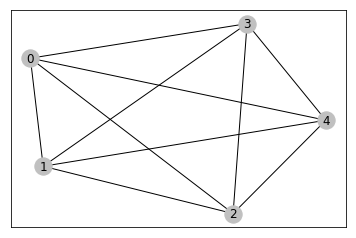

In [16]:
draw_graph(index, content) # content similarity network

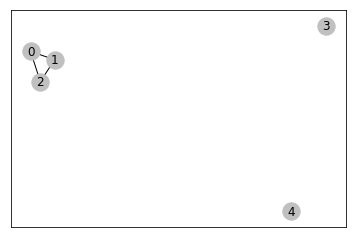

In [17]:
draw_graph(index, keyword) # keyword similarity network

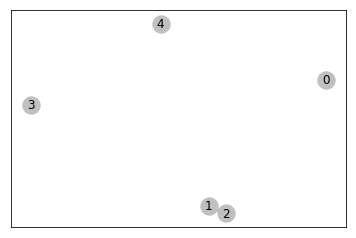

In [18]:
draw_graph(index, source) # source similarity network

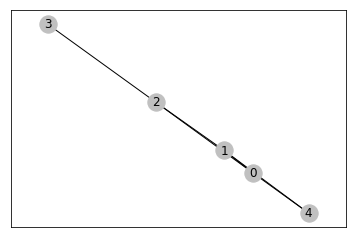

In [19]:
draw_graph(index, cross) # cross similarity network